# Final Project: Data Science Programme — Cambridge University & Flatiron School

Dataset: Energy Efficiency
The Dataset was downloaded from kaggle website.

**Why analyse Energy Efficiency's data?**

Reports suggest that building energy consumption has steadily increased over the past decades worldwide, and heating, ventilation and air conditioning (HVAC), which have a catalytic role in regulating the indoor climate, account for most of the energy use in the buildings. Therefore, designing energy-efficient buildings is vital in energy conservation and reducing energy consumption. Heating load (HL) and cooling load (CL) are the most important parameters in comparing energy efficiency in buildings. These parameters guide designers in determining required specifications of the heating and cooling equipment needed to maintain comfortable indoor air conditions. In order to estimate these parameters, more information about the characteristics of the building and of the conditioned space (for example occupancy and activity level) are needed. Eight important input parameters are considered in this study: relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area, and glazing area distribution, to determine the output variables of Heating Load and Cooling Load of residential buildings.


Building morphology is an important factor that could influence an increase/decrease of energy required to heat or cool the occupied space. The shape of a building has also an important impact on the construction costs but most important on the energy consumption and implicitly on the costs.

**Some guiding questions of this EDA:**

What is the effect of building morphology on energy consumption of buildings. 

Which parameters have direct corrolation with HL and CL?

What is the effect of glazing area on HL and CL?

**Approaches**

Read data,

Clean data for processing,

Statistical analysis,

Applying machine learning model.


# 1. Data Description 


## Importing our data and installing libraries

In [73]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import cycle, islice
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

First, read and append the csv file into the dataset

In [74]:
# Import the file 'energy_efficiency_data.csv'

df = pd.read_csv('energy_efficiency_data.csv')

# Print the number of rows and columns in df
#check shape of the data frame

print(df.shape)


(768, 10)


In order to get an insight of the geberal format of the dataset, the first and last five rows are printed. 

In [75]:
# Print the first five rows of df

df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [76]:
# Print the last five rows of df

df.tail()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [77]:
#check type

type(df)

pandas.core.frame.DataFrame

In [78]:
# Memory usage and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [79]:
# Checking for duplicates

df.duplicated().value_counts()

False    768
dtype: int64

In [80]:
# Checking initial statistics

df.describe().round(1)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,0.8,671.7,318.5,176.6,5.2,3.5,0.2,2.8,22.3,24.6
std,0.1,88.1,43.6,45.2,1.8,1.1,0.1,1.6,10.1,9.5
min,0.6,514.5,245.0,110.2,3.5,2.0,0.0,0.0,6.0,10.9
25%,0.7,606.4,294.0,140.9,3.5,2.8,0.1,1.8,13.0,15.6
50%,0.8,673.8,318.5,183.8,5.2,3.5,0.2,3.0,19.0,22.1
75%,0.8,741.1,343.0,220.5,7.0,4.2,0.4,4.0,31.7,33.1
max,1.0,808.5,416.5,220.5,7.0,5.0,0.4,5.0,43.1,48.0


checking some random statistics of the data

In [84]:
print(df['Wall_Area'].quantile(.9))
print(df['Heating_Load'].std())
print(df['Cooling_Load'].std())
print(df['Roof_Area'].mean())

367.5
10.090195732006158
9.513305562326169
176.60416666666666


There are possible ways to categorize the data by groups. I decided to categorize buildings based on their roof area to Large, Medium, and Small size buildings. I used the avergae roof area value to determine the cut-off values for these categories. 

In [85]:
conditions = [(df['Roof_Area'] <= 140), (df['Roof_Area'] > 140) & (df['Roof_Area'] <= 180), (df['Roof_Area'] > 180)]

# create a list of the values we want to assign for each condition
values = ['Small', 'Medium', 'Large']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Home_Size'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Home_Size
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,Small
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,Small
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,Small
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,Small
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,Small


In [86]:
print(df['Home_Size'].value_counts())

Large     384
Medium    192
Small     192
Name: Home_Size, dtype: int64


The number of data points for each category is shown in the following bar chart. 

<AxesSubplot:>

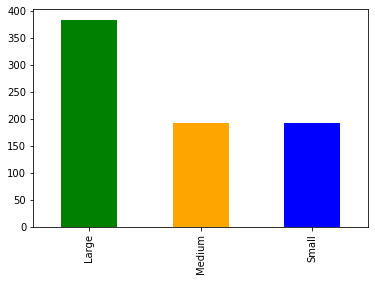

In [87]:

df['Home_Size'].value_counts().plot(kind='bar', color=['green','orange','blue'])



The average CL and HL of buildings in each category are copared here. 

<AxesSubplot:xlabel='Home_Size'>

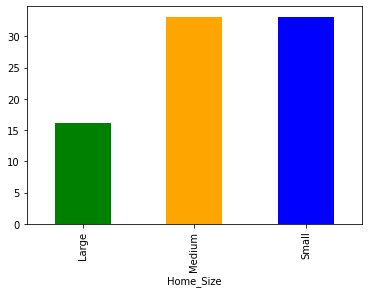

In [88]:
df.groupby('Home_Size')['Cooling_Load'].mean().plot.bar(color=['green','orange','blue'])

<AxesSubplot:xlabel='Home_Size'>

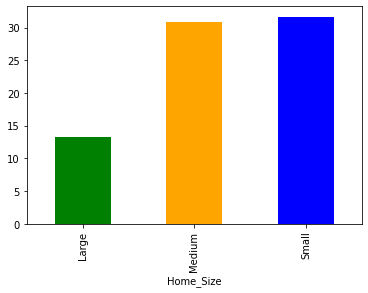

In [89]:
df.groupby('Home_Size')['Heating_Load'].mean().plot.bar(color=['green','orange','blue'])

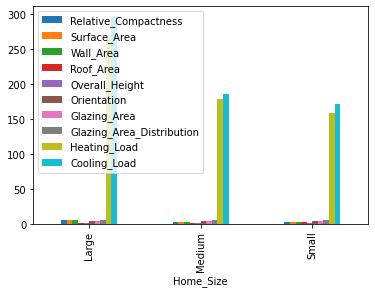

In [90]:
df.groupby('Home_Size').nunique().plot.bar()
plt.rcParams["figure.figsize"] = (12,7)

In order to get an insight about the corrolocation between all the parameters, the following chart is presented. The corrolation between HL and CL is shown which is reasonable. The other interesting point is the corrolation between overall height and HL/CL. 

<AxesSubplot:>

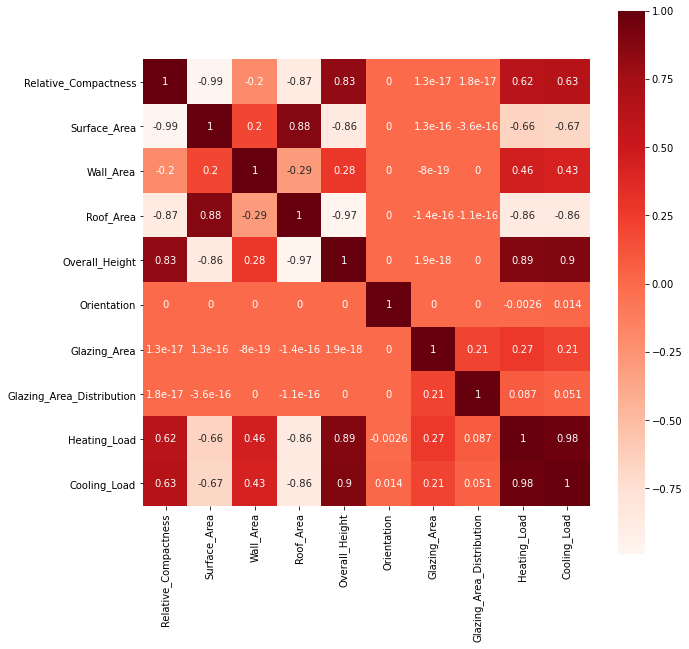

In [91]:
# Preview correlation

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),square=True,cmap="Reds", linecolor='w',annot=True, ax=ax) 

In [92]:
#calculate the correlation between the two arrays

print(np.corrcoef(df['Overall_Height'], df['Heating_Load']))
print(np.corrcoef(df['Roof_Area'], df['Heating_Load']))

[[1.         0.88943067]
 [0.88943067 1.        ]]
[[ 1.         -0.86182825]
 [-0.86182825  1.        ]]


In [63]:
# genders = df.Home_Size.unique()
# plt.hist([df.loc[df.Gender == x, 'Indicator'] for x in genders], label=genders)
# df.groupby('Home_Size').nunique().plot.hist()

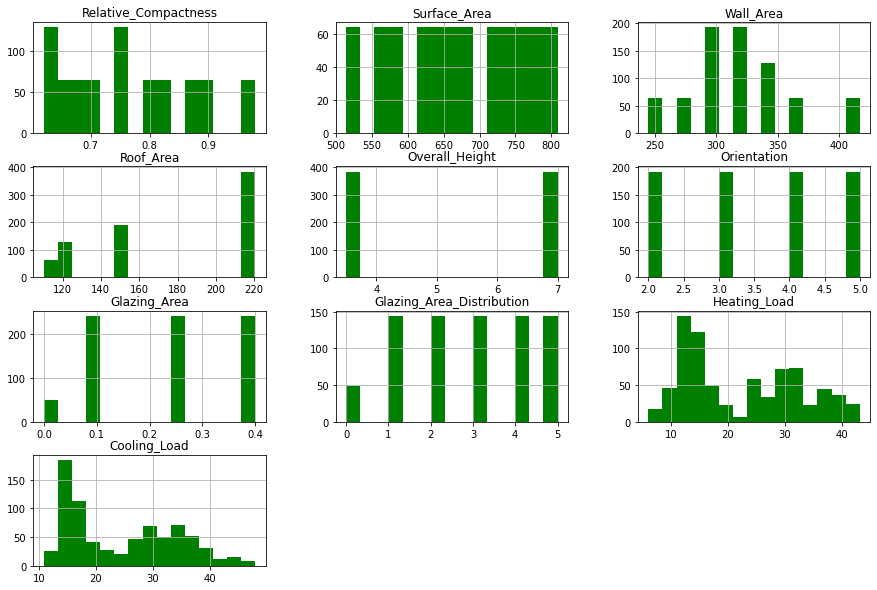

In [93]:
df.hist(bins=15, figsize=(15,10), color='green');

/Users/fs2v16/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/fs2v16/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/fs2v16/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/fs2v16/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/fs2v16/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


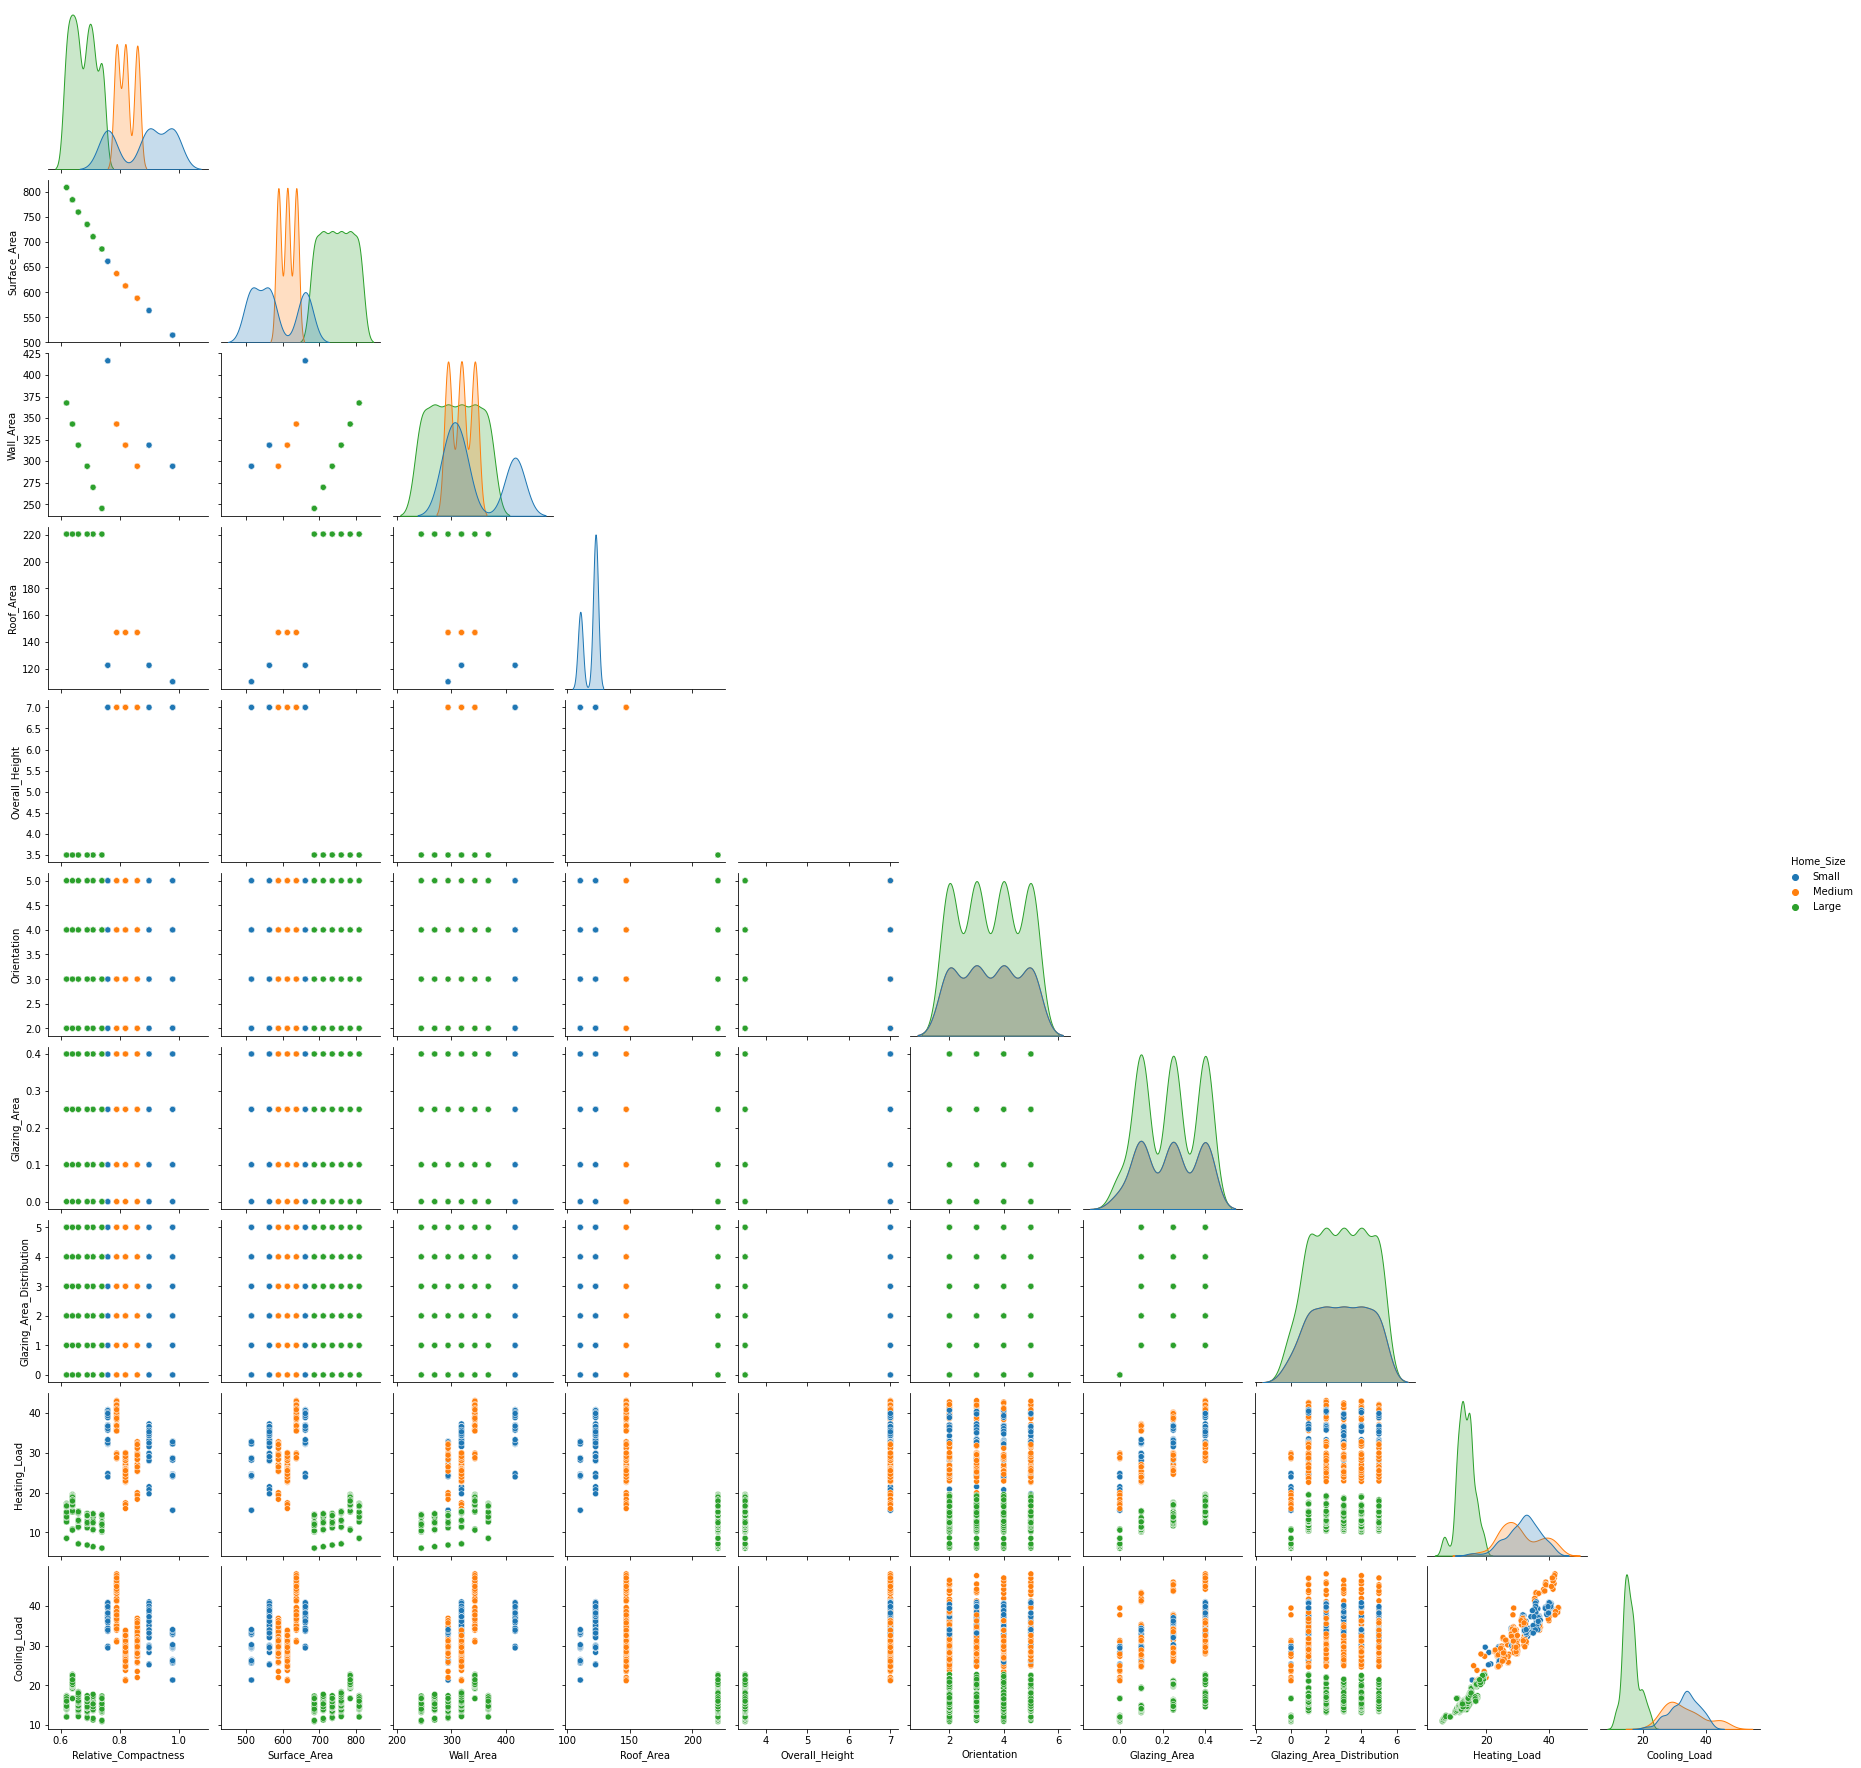

In [94]:
sns.pairplot(df,corner=True, hue='Home_Size')

<AxesSubplot:xlabel='Heating_Load', ylabel='Cooling_Load'>

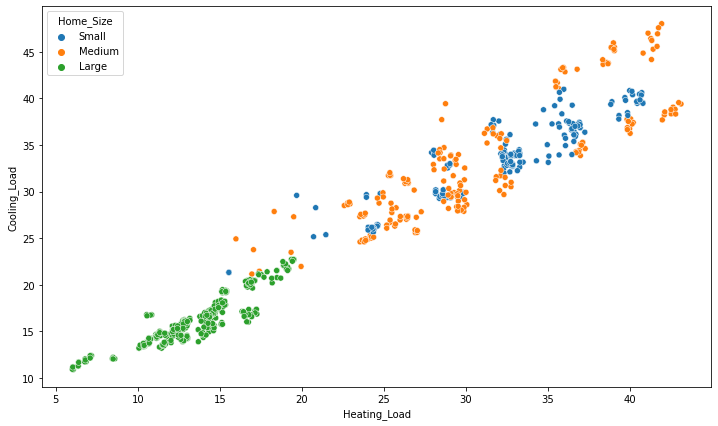

In [95]:
sns.scatterplot(data=df, x='Heating_Load', y = 'Cooling_Load', hue='Home_Size')

<AxesSubplot:xlabel='Surface_Area'>

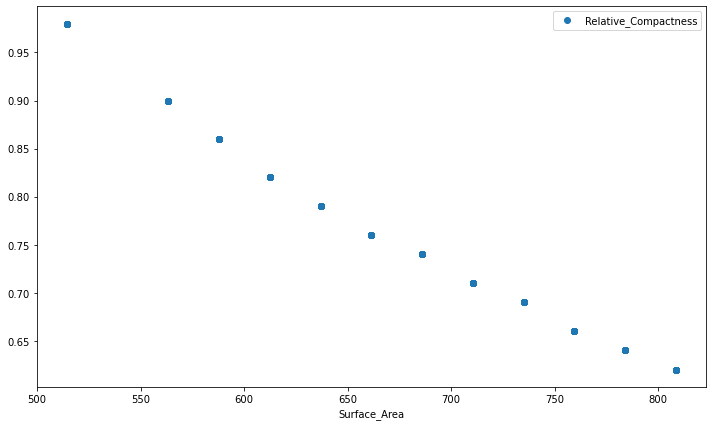

In [96]:
df.plot(x = 'Surface_Area',y = 'Relative_Compactness', style='o')

<AxesSubplot:xlabel='Cooling_Load'>

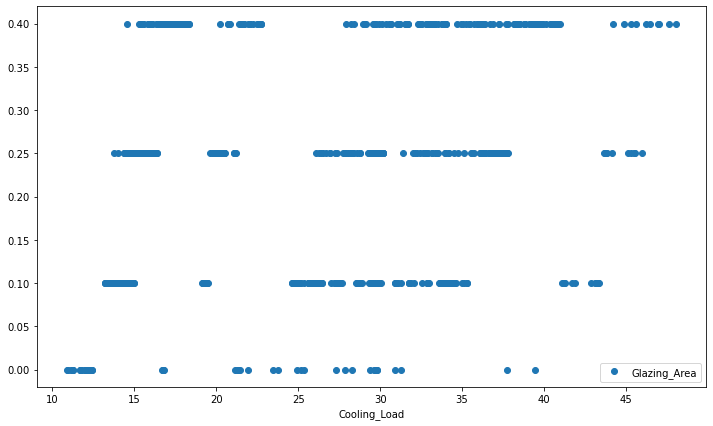

In [69]:
df.plot(x = 'Cooling_Load',y = 'Glazing_Area', style='o')

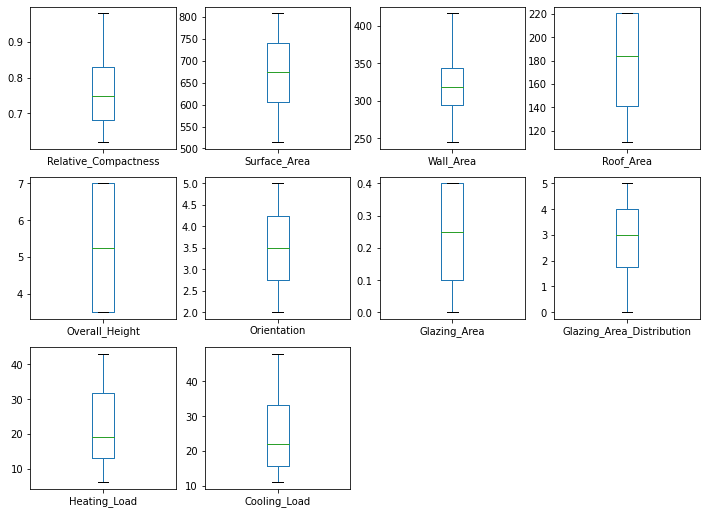

In [98]:
#boxplot
df.plot(kind = 'box', subplots = True, layout = (4, 4), sharex = False, sharey = False, figsize = (12, 12));

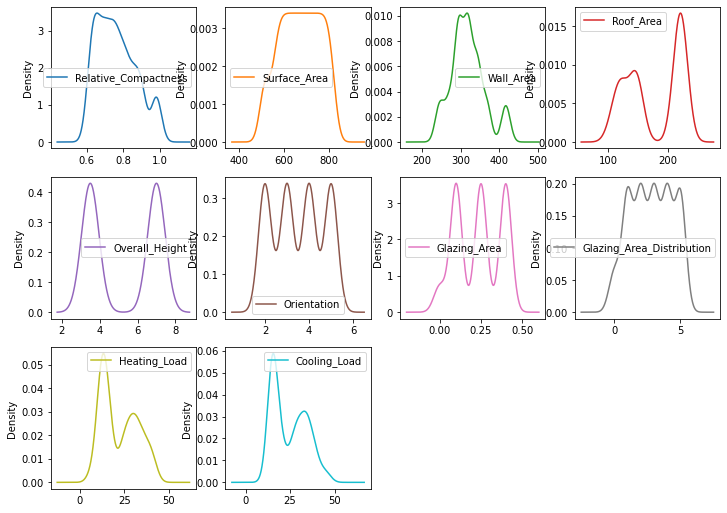

In [99]:
df.plot(kind = 'density', subplots= True, layout = (4,4), sharex =False, figsize = (12, 12));

Each feature has different scale, as we can see the minimum and maximum values for each of variables. To obtain a better scale, it is good to normalize the data because it makes distributions better.

In [107]:
#Normalize the inputs and set the output
from sklearn.preprocessing import Normalizer
nr = Normalizer(copy=False)
X = df.drop(['Heating_Load','Cooling_Load'], axis=1).values
y = (df[['Heating_Load','Cooling_Load']]).values
# X = df.drop(['Heating_Load','Cooling_Load'], axis=1)
# X = nr.fit_transform(X)
# y = df[['Heating_Load','Cooling_Load']]

In [114]:
#Surface Area Vs Wall Area
fig = px.density_heatmap(df, x=df['Surface_Area'], y=df['Wall_Area'], marginal_x="box", marginal_y="violin", title = "Surface Area Vs Wall Area")
fig.show()

In [ ]:
#Surface Area Vs Roof Area
fig = px.density_heatmap(df, x=df['Surface_Area'], y=df['Roof_Area'], marginal_x="box", marginal_y="violin")
fig.show()

In [ ]:
#Surface Area Vs Overall height
fig = px.density_heatmap(df, x=df['Surface_Area'], y=df['Overall_Height'], marginal_x="box", marginal_y="violin")
fig.show()

In [ ]:
#Glazing area Vs Glazing Area distribution
fig = px.density_heatmap(df, x=df['Glazing_Area'], y=df['Glazing_Area_Distribution'], marginal_x="box", marginal_y="violin")
fig.show()

In [ ]:
#Heating Load Vs Cooling Load 
fig = px.density_heatmap(df, x=df['Heating_Load'], y=df['Cooling_Load'], marginal_y="violin")
fig.show()

In [110]:
#BarPlot (Surface area, wall area, roof area)
fig = px.bar(df, x=df['Surface_Area'], y=df['Wall_Area'], color="Roof_Area", barmode="group")
fig.show()

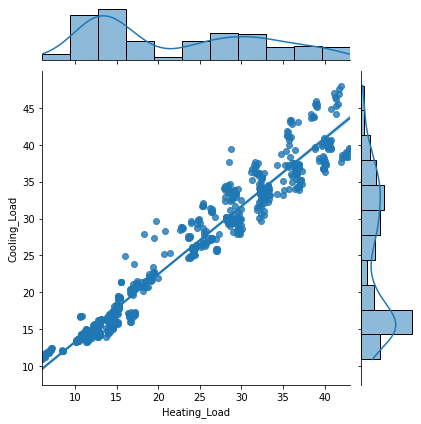

In [109]:
sns.jointplot(x=df['Heating_Load'], y=df['Cooling_Load'], data= df, kind="reg");

In [ ]:
# sns.pairplot(df, x_vars=[df['Surface_Area'], df['Overall_Height'], df['Orientation']], y_vars=df['Relative_Compactness'],height=5, aspect=.8, kind="reg");

In [ ]:
# sns.pairplot(df, x_vars=df['Surface_Area'], y_vars=df['Relative_Compactness'],height=5, aspect=.8, kind="reg");

In [ ]:
# df.plot(kind='density', subplots=True, layout=(5,2), figsize=(20, 15), sharex=False)
# plt.show()

In [ ]:
# boxplot(df)

In [ ]:
# plt.hist((df.heating_load))

# plt.hist((df.cooling_load))

<AxesSubplot:ylabel='Home_Size,Heating_Load'>

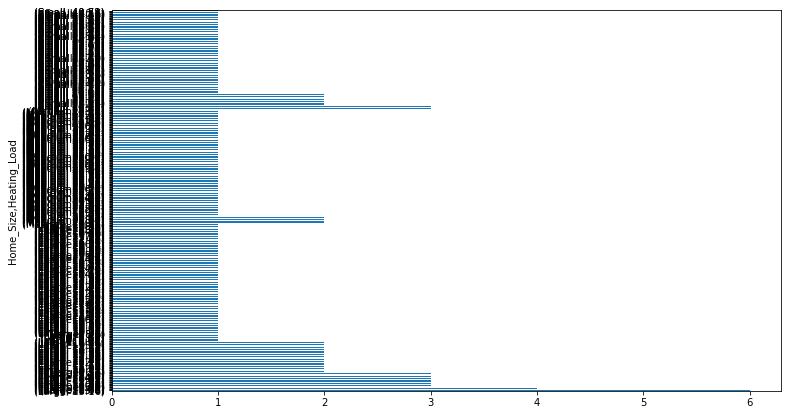

In [111]:
df.groupby('Home_Size').Heating_Load.value_counts().plot.barh()

In [ ]:
# pandas_profiling.ProfileReport(df)

In [112]:
pd.set_option('display.float_format',lambda x: '{:,.2f}'.format(x) if abs(x) < 10000 else '{:,.0f}'.format(x))
df.corr()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.00,-0.99,-0.20,-0.87,0.83,0.00,0.00,0.00,0.62,0.63
Surface_Area,-0.99,1.00,0.20,0.88,-0.86,0.00,0.00,-0.00,-0.66,-0.67
Wall_Area,-0.20,0.20,1.00,-0.29,0.28,0.00,-0.00,0.00,0.46,0.43
Roof_Area,-0.87,0.88,-0.29,1.00,-0.97,0.00,-0.00,-0.00,-0.86,-0.86
Overall_Height,0.83,-0.86,0.28,-0.97,1.00,0.00,0.00,0.00,0.89,0.90
Orientation,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.00,0.01
Glazing_Area,0.00,0.00,-0.00,-0.00,0.00,0.00,1.00,0.21,0.27,0.21
Glazing_Area_Distribution,0.00,-0.00,0.00,-0.00,0.00,0.00,0.21,1.00,0.09,0.05
Heating_Load,0.62,-0.66,0.46,-0.86,0.89,-0.00,0.27,0.09,1.00,0.98
Cooling_Load,0.63,-0.67,0.43,-0.86,0.90,0.01,0.21,0.05,0.98,1.00


The tables shows that there is a strong correlation between targets. We cannot exclude one of those, because heating load and cooling are equally important outputs to be predicted.

In [113]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Surface_area'], df['Cooling_Rate'], test_size = 0.3, random_state =123)

KeyError: 'Surface_area'

In [ ]:
train, validate, test = np.split(df.sample(frac=1, random_state=42),
                                [int(.6*len(df)), int(.8*len(df))])
print("train " , train)
print("validate " , validate)
print("test " , test)

In [ ]:
#now i split x columns and y columns
x_train = train.iloc[:,:-2]
y_train = train.iloc[:,8:]
x_valid = validate.iloc[:,:-2]
y_valid = validate.iloc[:,8:]
x_test = test.iloc[:,:-2]
y_test = test.iloc[:,8:]

In [ ]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

In [ ]:
def print_score(m):
    m.fit(x_train,y_train)
    
    print(f"R^2 of train set: {m.score(x_train, y_train)}")
    print(f"R^2 of validation set: {m.score(x_valid, y_valid)}")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 0)


from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# %% [code]
lr.coef_

# %% [code]
y_pred = lr.predict(X_test)

# %% [code]
df_1 = pd.DataFrame({'Actual': y_test["heating_load"], 'Predicted': y_pred[:,0]})
print(df.head(10))
print("\n______________________\n")
df_2 = pd.DataFrame({'Actual': y_test["cooling_load"], 'Predicted': y_pred[:,1]})
print(df.head(10))

# %% [code]
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(lr, X, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# %% [code]
from sklearn.metrics import mean_absolute_error ,mean_squared_error , r2_score
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred) 
r2_value = r2_score(y_test, y_pred)                     

print("Intercept: \n", lr.intercept_)
print("Mean Square Error \n", MSE)
print("Mean Absolute Error \n", MAE)
print("R^2 Value: \n", r2_value)

# %% [code]